### step13 c)d) using my library

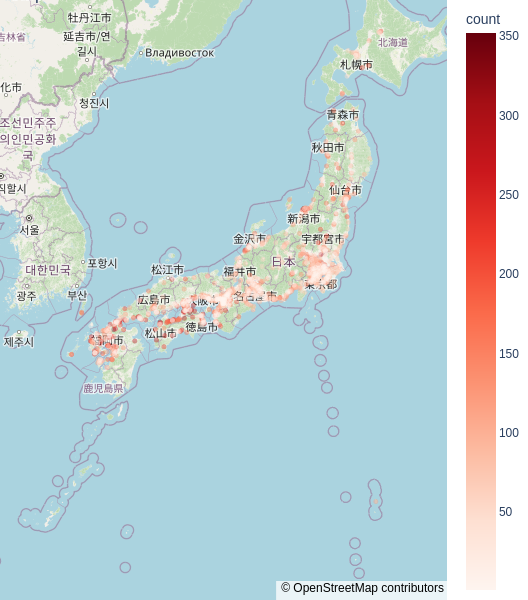

In [23]:
# import necessary libraries
from s1290224_learn.statistics import frequenciesOfItems
from s1290224_learn.visualization import heatMapItemsFrequencies

# create an instance of frequenciesOfItems class
itemsFrequencies = frequenciesOfItems.frequenciesOfItems('PM24HeavyPollutionRecordingSensors.csv',',')

# generate a dictionary of frequency
itemsFrequenciesDictionary = itemsFrequencies.getFrequencies()

# pass the dictionary to an instance of heatMapItemsFrequencies class
map = heatMapItemsFrequencies.heatMapItemsFrequencies(itemsFrequenciesDictionary)

# plot the map using the instance
map.show()

### Continue from the knowledge discovery step of Exercise-13

####  i)  Implement the FP-growth algorithm and ii) Store the patterns in a file, frequentPatterns.txt

In [21]:
#import the frequent pattern mining algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg

#inputFile = 'fileName'
inputFile = 'PM24HeavyPollutionRecordingSensors.csv'

#specify the constraints used in the model
minSup=224

#create the object of the mining algorithm 
obj = alg.FPGrowth(inputFile, minSup, sep=',')

#start the mining process
obj.startMine()

#Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

#Save the generated patterns in a file
obj.save('frequentPatterns.txt')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 116
Total Memory in RSS 230375424
Total ExecutionTime in seconds: 0.30056309700012207


####  iii) Write a Python code that reads the frequentPatterns.txt file, identifies the longest pattern, and shows it on a plotly express open street map

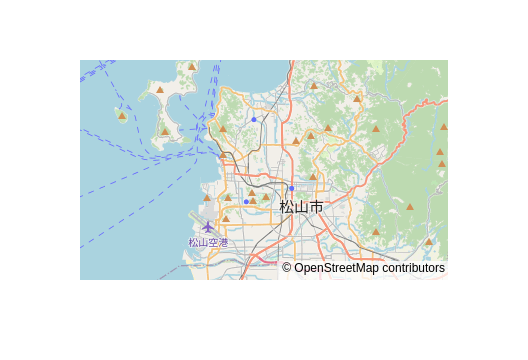

In [22]:
import re
import plotly.express as px


# list to store longtitudes and latitudes in the file
patterns = []

# read frequentPatterns.txt file
with open("frequentPatterns.txt") as f:
    # store all (lon, lat) from each row in the file to list
    for line in f:
        pattern = re.findall(r'POINT\((\d+\.\d+) (\d+\.\d+)\)', line)
        patterns.append(pattern)

# extract the longest pattern
longest_pattern = max(patterns, key=len)


# store latitudes and longtitudes from the longest pattern
latitudes = []
longtitudes = []
for lon, lat in longest_pattern:
    latitudes.append(float(lat))
    longtitudes.append(float(lon))


# plot the longest pattern on the map
fig = px.scatter_mapbox(lat = latitudes, 
                        lon = longtitudes, 
                        zoom = 10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()